In [42]:
# Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
from pprint import pprint
import os

In [43]:
# Store filepath in a variable
file_one = os.path.join("Resources", "2015.csv")
file_two = os.path.join("Resources", "2016.csv")
file_three = os.path.join("Resources", "2017.csv")
file_four = os.path.join("Resources", "fertility_rate.csv")
file_five = os.path.join("Resources", "GDP_per_capita.csv")

In [44]:
# Read our Data files with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
hapiness_2015_df = pd.read_csv(file_one, encoding="ISO-8859-1")
hapiness_2016_df = pd.read_csv(file_two, encoding="ISO-8859-1")
hapiness_2017_df = pd.read_csv(file_three, encoding="ISO-8859-1")
fertility_rate_df = pd.read_csv(file_four, encoding="ISO-8859-1")
gdp_per_capita_df = pd.read_csv(file_five, encoding="ISO-8859-1")

In [45]:
# Show 5 rows and the header 
gdp_per_capita_df.head(3)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,373.361116,445.893298,553.300289,603.537023,669.009051,638.612543,629.345250,569.577923,561.778746,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN


In [46]:
#rename the collumn
hapiness_2015_df = hapiness_2015_df.loc[:,["Country","Happiness Score"]]

In [47]:
#drop missing values from data frame
gdp_per_capita_df = gdp_per_capita_df.loc[:,["Country Name","2015"]]
gdp_per_capita_df = gdp_per_capita_df.dropna(how='any')
gdp_per_capita_df.head()

,Country Name,2015
1,Afghanistan,569.577923
2,Angola,3695.793748
3,Albania,3934.895394
4,Andorra,36038.267600
5,Arab World,6435.525509


In [48]:
#change the values of a collumn to numeric
gdp_per_capita_df["2015"] = pd.to_numeric(gdp_per_capita_df["2015"])
gdp_per_capita_df.head()

,Country Name,2015
1,Afghanistan,569.577923
2,Angola,3695.793748
3,Albania,3934.895394
4,Andorra,36038.267600
5,Arab World,6435.525509


In [49]:
#rename the collumn
gdp_per_capita_df = gdp_per_capita_df.rename(columns={"2015":"GDP Per Capita 2015"})

In [50]:
#drop missing values from data frame
fertility_rate_df = fertility_rate_df.loc[:,["Country Name","2015"]]
fertility_rate_df = fertility_rate_df.dropna(how='any')
fertility_rate_df.head()

,Country Name,2015
0,Aruba,1.80100
1,Afghanistan,4.80200
2,Angola,5.76600
3,Albania,1.71400
5,Arab World,3.37384


In [51]:
#rename the collumn
fertility_rate_df = fertility_rate_df.rename(columns={"2015":"Birth Rate 2015"})
fertility_rate_df.head()

,Country Name,Birth Rate 2015
0,Aruba,1.80100
1,Afghanistan,4.80200
2,Angola,5.76600
3,Albania,1.71400
5,Arab World,3.37384


In [52]:
#renamethe the collumn
hapiness_2015_df = hapiness_2015_df.rename(columns={"Country":"Country Name"})
hapiness_2015_df.head()

,Country Name,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


In [53]:
#merge hapiness score and birth rate dataframes
merged_dataframe = pd.merge(hapiness_2015_df, fertility_rate_df, on="Country Name")
merged_dataframe.head()

,Country Name,Happiness Score,Birth Rate 2015
0,Switzerland,7.587,1.54
1,Iceland,7.561,1.93
2,Denmark,7.527,1.69
3,Norway,7.522,1.75
4,Canada,7.427,1.60


In [54]:
#merge dataframe with gdp per capita dataframe
merged_dataframe = pd.merge(merged_dataframe, gdp_per_capita_df, on="Country Name")
merged_dataframe.head(5)

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
0,Switzerland,7.587,1.54,82016.02131
1,Iceland,7.561,1.93,50734.44360
2,Denmark,7.527,1.69,53012.99658
3,Norway,7.522,1.75,74498.13764
4,Canada,7.427,1.60,43335.15911


In [55]:
#set the values to numeric
pd.to_numeric(merged_dataframe["GDP Per Capita 2015"], errors='coerce')
pd.to_numeric(merged_dataframe["GDP Per Capita 2015"], errors='coerce')
#organise the dataframe based on GDp per capita from bigest to smallest
organised_df = merged_dataframe.sort_values("GDP Per Capita 2015", ascending=False)
organised_df.head()

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
16,Luxembourg,6.946,1.500,101446.78630
0,Switzerland,7.587,1.540,82016.02131
3,Norway,7.522,1.750,74498.13764
26,Qatar,6.611,1.929,66346.52267
17,Ireland,6.940,1.940,62544.63129


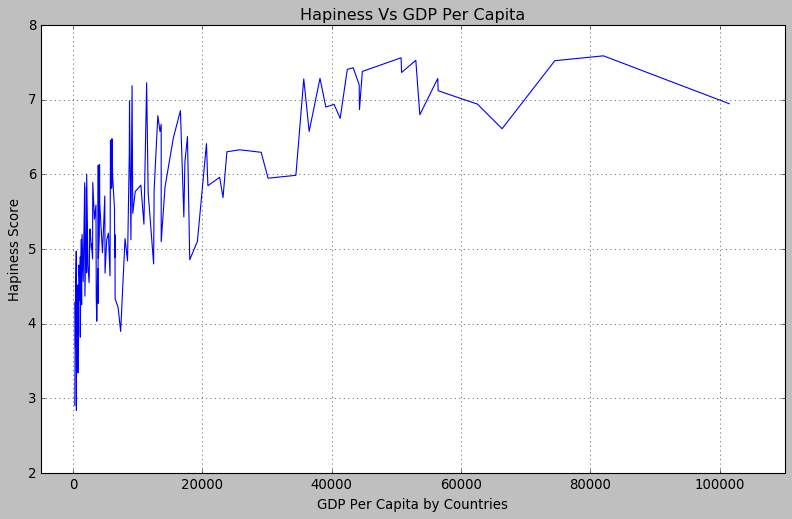

In [56]:
#sytling the plot
with plt.style.context(('classic')):
    #Changing the size of the figure
    plt.figure(figsize=(12, 7)) 
#create line chart based on hapiness score and GDP per capita 
    plt.plot(organised_df["GDP Per Capita 2015"], organised_df["Happiness Score"])
#create a title
    plt.title("Hapiness Vs GDP Per Capita")
#create a y label
    plt.ylabel("Hapiness Score")
#create a x label
    plt.xlabel("GDP Per Capita by Countries")
#create y and x labels
    plt.ylim(2, 8)
    plt.xlim(-5000, 110000)
#create grids
    plt.grid()
#save chart as png
    plt.savefig('Hapiness Vs GDP Per Capita.png')
    plt.show()

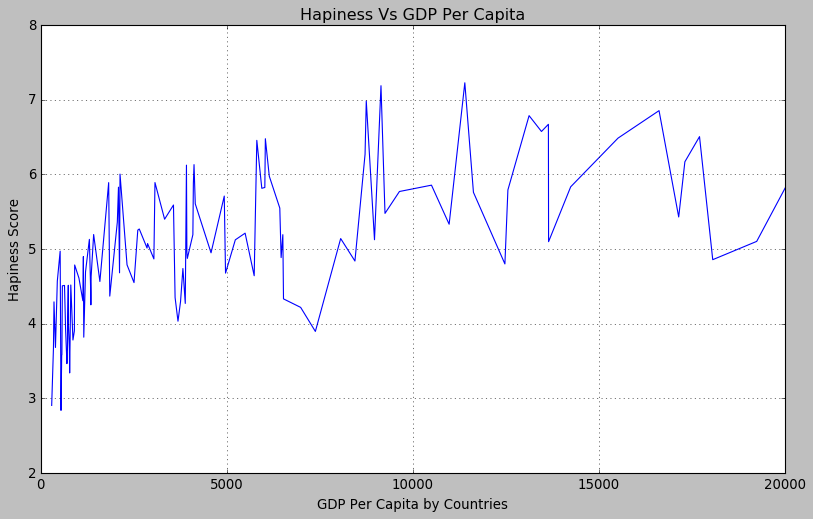

In [57]:
#sytling the plot
with plt.style.context(('classic')):
    #Changing the size of the figure
    plt.figure(figsize=(12, 7)) 
#create line chart based on hapiness score and GDP per capita bettween $0 to $20000
    plt.plot(organised_df["GDP Per Capita 2015"], organised_df["Happiness Score"])
#create a title
    plt.title("Hapiness Vs GDP Per Capita")
#create a y label
    plt.ylabel("Hapiness Score")
#create a x label
    plt.xlabel("GDP Per Capita by Countries")
    plt.ylim(2, 8)
    plt.xlim(0, 20000)
    plt.grid()
#save chart as png
    plt.savefig('Hapiness Vs GDP Per Capita $0 - $ 20000.png')
    plt.show()

In [58]:
#dataframe reorganised based on hapiness score
organised_df = merged_dataframe.sort_values("Happiness Score", ascending=False)
len(organised_df)

137

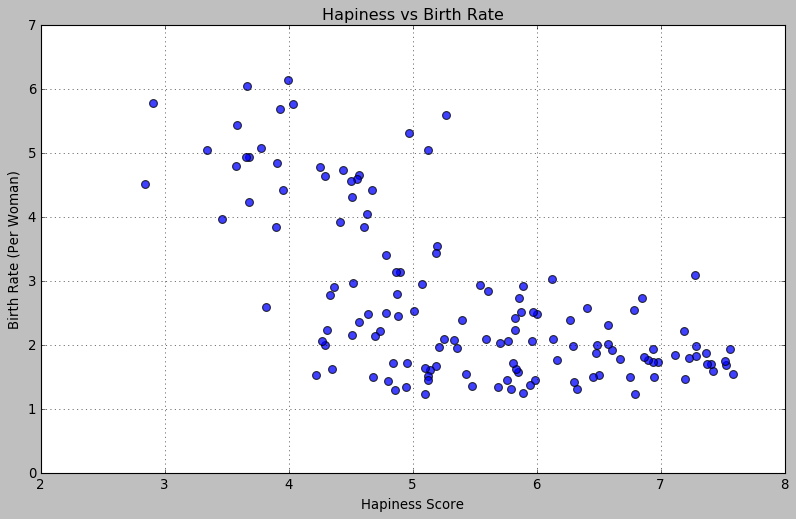

In [59]:
#sytling the plot
with plt.style.context(('classic')):
    #Changing the size of the figure
    plt.figure(figsize=(12, 7)) 
#create scatter plot based on birth rate and hapiness score
    plt.scatter(organised_df["Happiness Score"], organised_df["Birth Rate 2015"], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
#create a title
    plt.title("Hapiness vs Birth Rate")
#create a y label
    plt.ylabel("Birth Rate (Per Woman)")
#create a x label
    plt.xlabel("Hapiness Score")
# create y and x limits
    plt.ylim(0, 7)
    plt.xlim(2, 8)
#add a grid
    plt.grid()
    
#save chart as png
    plt.savefig('Hapiness vs Birth Rate.png')
    plt.show()

In [60]:
#Excract data to csv
writer = pd.ExcelWriter('Happiness_Data.xlsx')
organised_df.to_excel(writer, index=False, sheet_name='Happiness_Data')